###code for visualizations and understanding data

In [25]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
!ls drive/MyDrive/pfa-case

# drive/MyDrive/pfa-case/san-francisco-ca_.geojson

model.ipynb		   sf_data.csv	     sf_districts.gsheet
san-francisco-ca_.geojson  sf_districts.csv  visualize.ipynb


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The san Fransisco Crime Dataset contains data on Crimes in the city of San Fransisco during the years 2013-2018.
Data are stored in *semi-colon separated* format in two files as described below.

*** sf_data.csv ***
Data on each crime reported, along with various metadata, stored under the following columns:
- id: A number which uniquely identifies each crime report
- category: A Somewhat fine-grained description, such as 'assault, 'vandalism', etc.
- description: A more fine-grained description.
- weekday: Which day of the week the crime was registered.
- date: Which date (mm/dd/yyy) the crime was reported
- time: Which time (hh:mm) the cime was reported
- resolution: The outcome of the report
- longitude: The longitude (degrees east of Greenwich) at which crime was reported
- latitude: The latitude (degrees north of equator) at which crime was reported
- label: A more general category assigned to crime types


*** sf_districts.csv ***
Some districts of interest are defined by rectangular bounding boxes in terms of latitude-longitude.
This file contains information on which crimes occurred within which such district.
Data are stored in the following columns:
- id: A number which uniquely identifies each crime report. Corresponds to the id's in sf_data.csv.
- district: The name of the district in which the crime was reported.

In [28]:
data_path = 'drive/MyDrive/pfa-case/sf_data.csv'
districts_path = 'drive/MyDrive/pfa-case/sf_districts.csv'

In [64]:
# Load the CSV file into a DataFrame
df_districts = pd.read_csv(districts_path)

# Display the first few rows of the DataFrame to understand its structure
print(df_districts.shape)


(592854, 1)


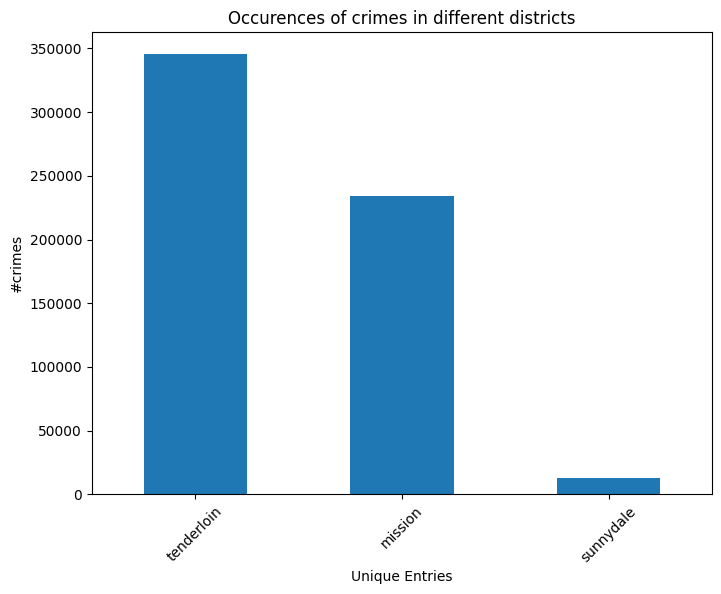

In [60]:
districts_data = pd.read_csv(districts_path, sep=";")
districts = districts_data['district'].unique()
value_counts = districts_data['district'].value_counts()

# Plotting histogram
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Occurences of crimes in different districts')
plt.xlabel('Unique Entries')
plt.ylabel('#crimes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [65]:
# Use pandas to read the CSV file into a DataFrame
crime_data = pd.read_csv(data_path, sep=";")
print(crime_data.shape)

(2129216, 10)


In [62]:
merged_df = pd.merge(crime_data, districts_data[['id', 'district']], on='id', how='left')

In [70]:
crime_data = merged_df

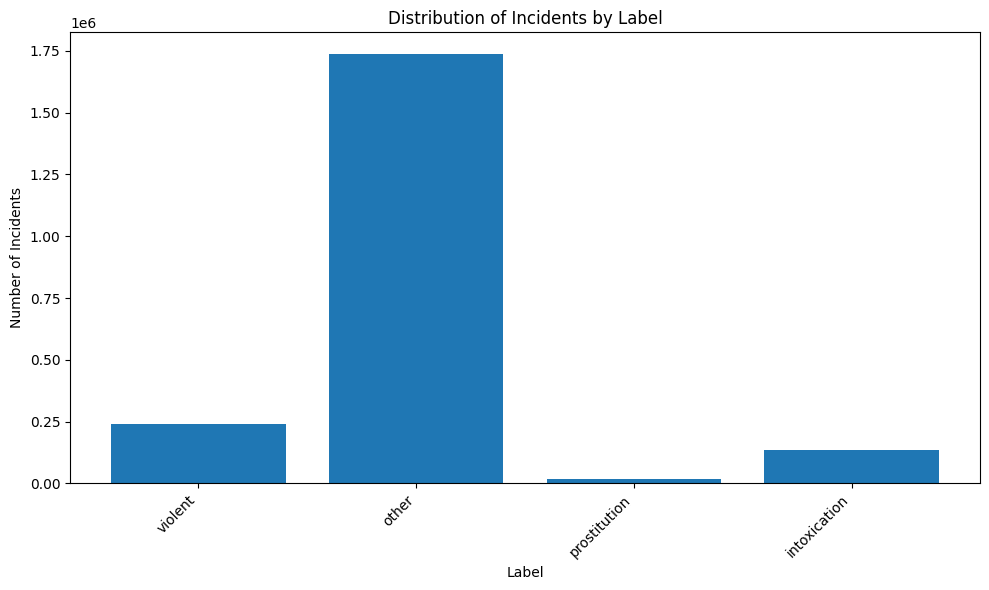

In [71]:
# Plot histogram of incident labels
plt.figure(figsize=(10, 6))
plt.hist(crime_data['label'], bins=range(len(crime_data['label'].unique()) + 1), align='left', rwidth=0.8)
plt.title('Distribution of Incidents by Label')
plt.xlabel('Label')
plt.ylabel('Number of Incidents')
plt.xticks(range(len(crime_data['label'].unique())), crime_data['label'].unique(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

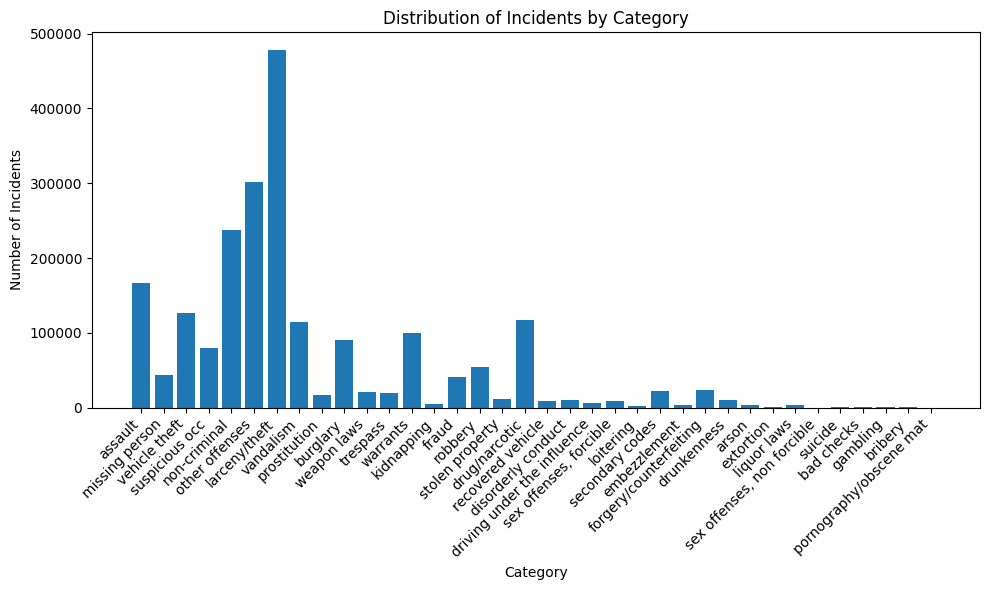

In [72]:
# Plot histogram of incident categories
plt.figure(figsize=(10, 6))
plt.hist(crime_data['category'], bins=range(len(crime_data['category'].unique()) + 1), align='left', rwidth=0.8)
plt.title('Distribution of Incidents by Category')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.xticks(range(len(crime_data['category'].unique())), crime_data['category'].unique(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
crime_data['category'].unique()

array(['assault', 'missing person', 'vehicle theft', 'suspicious occ',
       'non-criminal', 'other offenses', 'larceny/theft', 'vandalism',
       'prostitution', 'burglary', 'weapon laws', 'trespass', 'warrants',
       'kidnapping', 'fraud', 'robbery', 'stolen property',
       'drug/narcotic', 'recovered vehicle', 'disorderly conduct',
       'driving under the influence', 'sex offenses, forcible',
       'loitering', 'secondary codes', 'embezzlement',
       'forgery/counterfeiting', 'drunkenness', 'arson', 'extortion',
       'liquor laws', 'sex offenses, non forcible', 'suicide',
       'bad checks', 'gambling', 'bribery', 'pornography/obscene mat'],
      dtype=object)

In [74]:

# Function to map categories to new categories
def map_new_category(category):
    if category in ['assault', 'kidnapping', 'robbery', 'sex offenses, forcible']:
        return 'Violent Crimes'
    elif category in ['larceny/theft', 'vehicle theft', 'vandalism', 'burglary', 'stolen property', 'arson']:
        return 'Property Crimes'
    # elif category in ['larceny/theft']:
    #     return 'larceny/theft'
    elif category in ['drug/narcotic', 'driving under the influence', 'liquor laws']:
        return 'Drug and Substance Related Crimes'
    # elif category in ['missing person', 'suspicious occ', 'non-criminal', 'other offenses', 'trespass', 'disorderly conduct', 'loitering', 'forgery/counterfeiting', 'embezzlement', 'fraud', 'extortion', 'bad checks', 'bribery', 'pornography/obscene mat']:
    #     return 'Miscellaneous Crimes'
    # elif category in ['prostitution', 'gambling']:
    #     return 'Vice and Morality Related Crimes'
    elif category in ['weapon laws', 'warrants', 'secondary codes']:
        return 'Legal Violations'
    # elif category == 'sex offenses, non forcible':
    #     return 'Sexual Offenses'
    else:
        return 'Other'

# Apply the function to create the new_category column
crime_data['new_category'] = crime_data['category'].apply(map_new_category)

# Display the updated dataframe
crime_data


,id,category,description,weekday,date,time,resolution,longitude,latitude,label,new_category,district
0,5069701104134,assault,battery,wednesday,06/22/2005,12:20,none,-122.428223,37.781896,violent,Violent Crimes,NaN
1,6074729204104,assault,assault,saturday,07/15/2006,00:55,none,-122.410672,37.799789,violent,Violent Crimes,NaN
2,7103536315201,assault,stalking,tuesday,09/25/2007,00:01,none,-122.458226,37.741362,violent,Violent Crimes,NaN
3,11082415274000,missing person,missing adult,saturday,09/24/2011,11:00,located,-122.459173,37.708200,other,Other,NaN
4,4037801104134,assault,battery,friday,12/12/2003,12:00,none,-122.386667,37.789882,violent,Violent Crimes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2129211,17050730416710,drug/narcotic,possession of narcotics paraphernalia,thursday,06/22/2017,01:42,"arrest, cited",-122.398699,37.798880,intoxication,Drug and Substance Related Crimes,NaN
2129212,17071435504014,assault,aggravated assault with bodily force,friday,09/01/2017,17:00,none,-122.443312,37.770470,violent,Violent Crimes,NaN
2129213,17053348465010,other offenses,traffic violation arrest,friday,06/30/2017,17:50,"arrest, booked",-122.387068,37.755446,other,Other,NaN
2129214,17102776330130,other offenses,peddling without a license,wednesday,12/20/2017,15:41,"arrest, booked",-122.412515,37.780478,other,Other,tenderloin


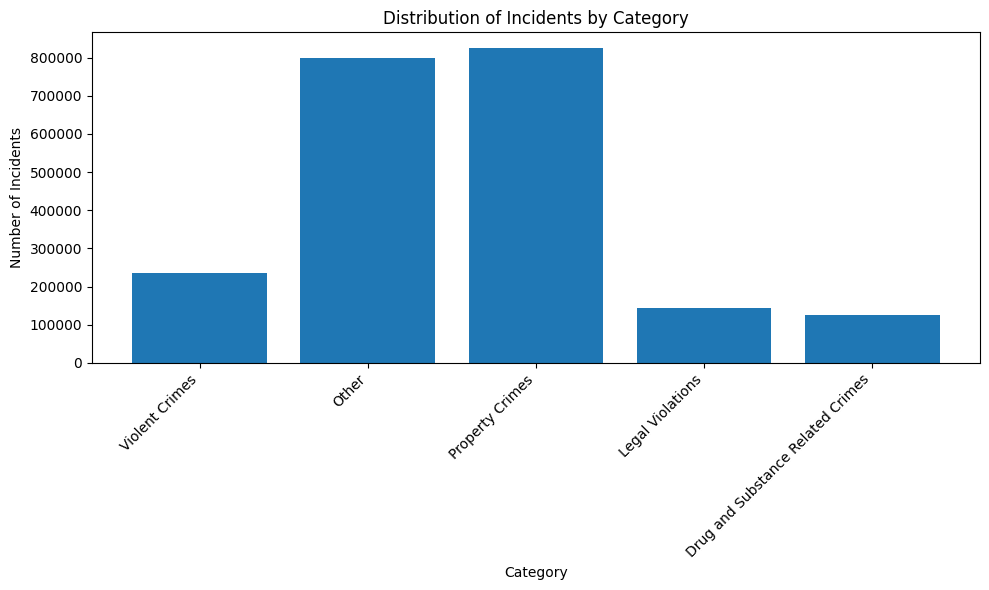

In [89]:
# Plot histogram of incident categories
plt.figure(figsize=(10, 6))
plt.hist(crime_data['new_category'], bins=range(len(crime_data['new_category'].unique()) + 1), align='left', rwidth=0.8)
plt.title('Distribution of Incidents by Category')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.xticks(range(len(crime_data['new_category'].unique())), crime_data['new_category'].unique(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

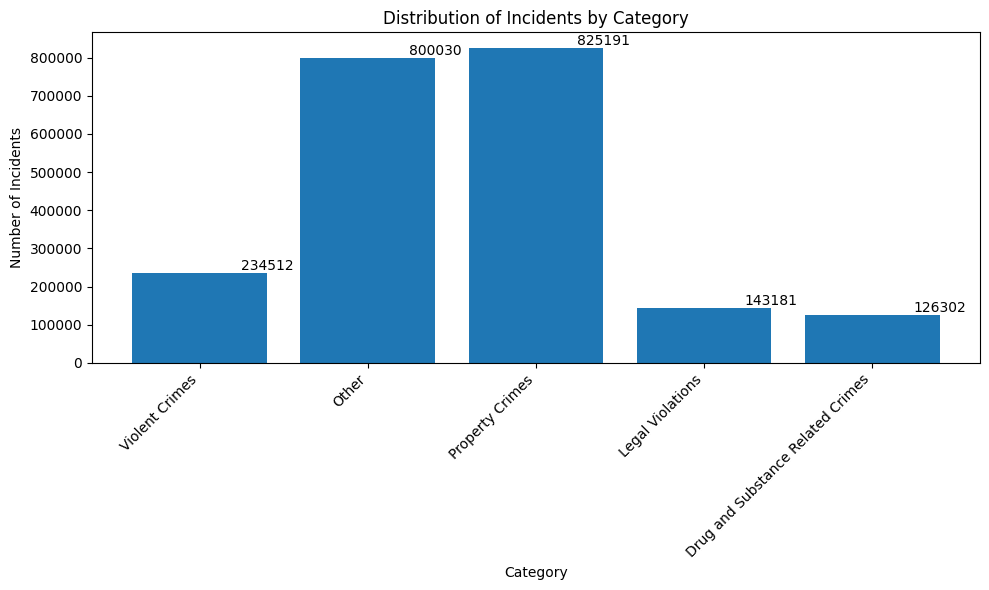

In [90]:
# Plot histogram of incident categories with annotations
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(crime_data['new_category'], bins=range(len(crime_data['new_category'].unique()) + 1), align='left', rwidth=0.8)
plt.title('Distribution of Incidents by Category')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.xticks(range(len(crime_data['new_category'].unique())), crime_data['new_category'].unique(), rotation=45, ha='right')

# Annotate each bar with its count
for i in range(len(hist)):
    plt.text(bins[i] + 0.4, hist[i] + 5, str(int(hist[i])), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [97]:
import random
# Identify the category that occurs much more frequently
frequent_category = crime_data['new_category'].value_counts().idxmax()

# Get the indices of the entries with the frequent category
frequent_category_indices = crime_data[crime_data['new_category'] == frequent_category].index

# Calculate the number of entries to keep (one third of the total)
num_samples_to_keep = len(frequent_category_indices) // 3

# Randomly select a subset of indices to keep
indices_to_keep = frequent_category_indices.to_list()
indices_to_remove = random.sample(indices_to_keep, len(indices_to_keep) - num_samples_to_keep)

# Remove the randomly selected indices from the DataFrame
filtered_df = crime_data.drop(index=indices_to_remove)

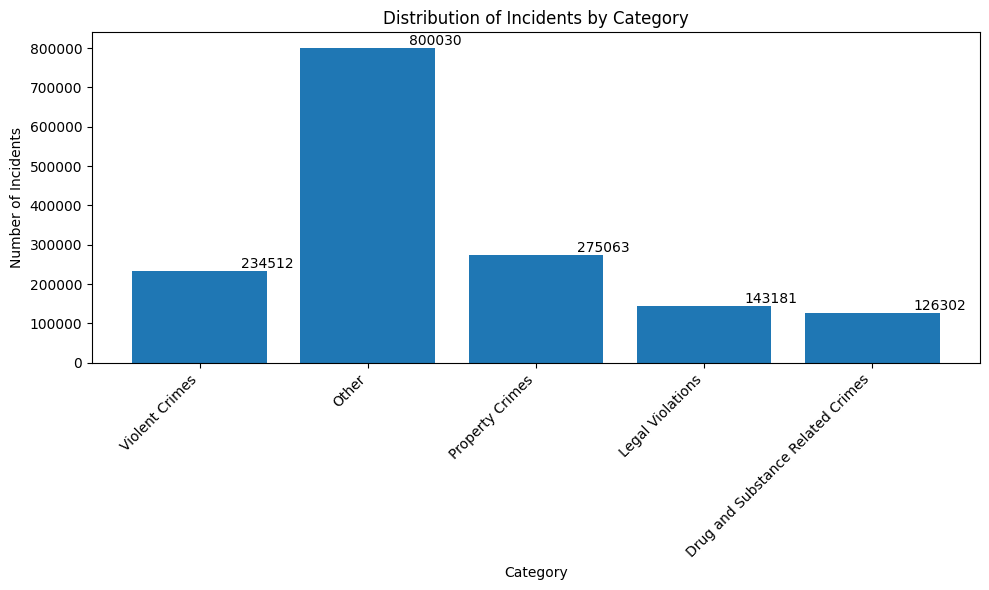

In [98]:
# Plot histogram of incident categories with annotations
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(filtered_df['new_category'], bins=range(len(filtered_df['new_category'].unique()) + 1), align='left', rwidth=0.8)
plt.title('Distribution of Incidents by Category')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.xticks(range(len(filtered_df['new_category'].unique())), filtered_df['new_category'].unique(), rotation=45, ha='right')

# Annotate each bar with its count
for i in range(len(hist)):
    plt.text(bins[i] + 0.4, hist[i] + 5, str(int(hist[i])), ha='center', va='bottom')

plt.tight_layout()
plt.show()


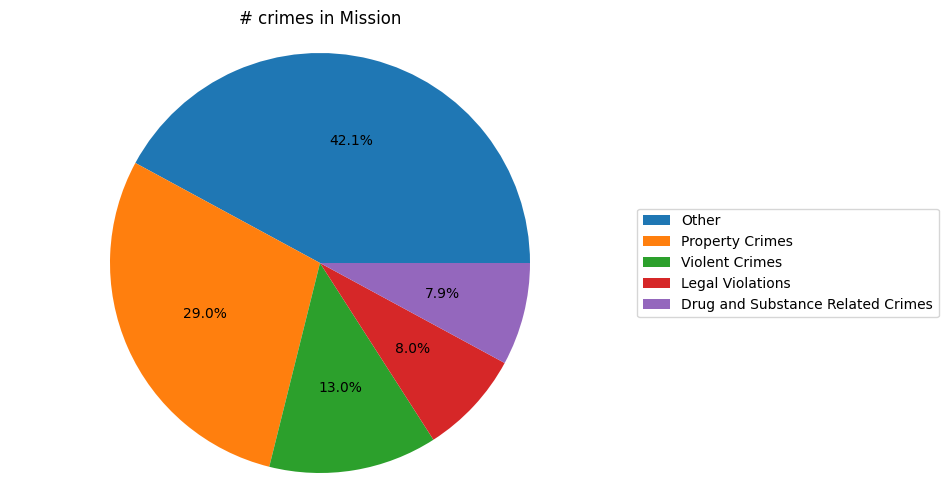

In [88]:
# Filter the DataFrame based on the specific locations
filtered_df = crime_data[crime_data['district'].isin(['mission'])]

# Count the occurrences of each category in the filtered DataFrame
category_counts = filtered_df['new_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, autopct='%1.1f%%')
plt.title('# crimes in Mission')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(category_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [80]:
print(districts)

['sunnydale' 'tenderloin' 'mission']


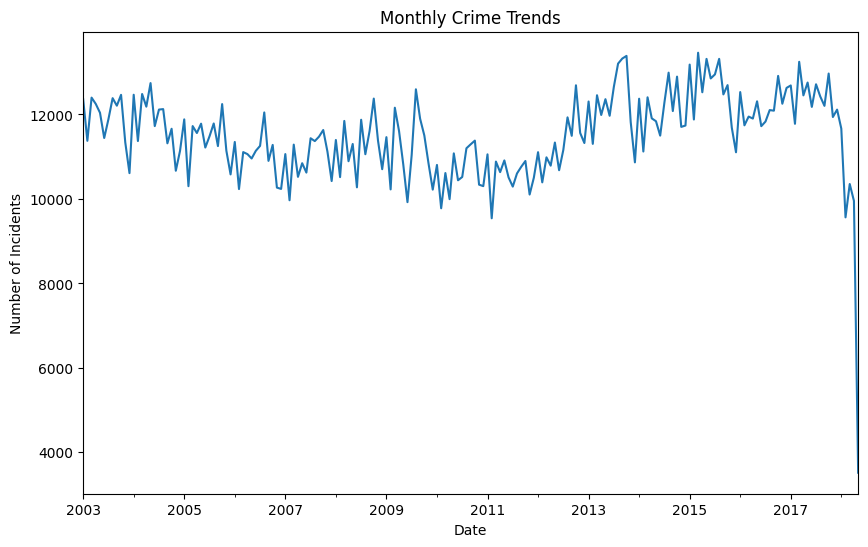

In [ ]:

# Convert 'date' column to datetime format
crime_data['date'] = pd.to_datetime(crime_data['date'])

# Set 'date' column as the index for time-based analysis
crime_data.set_index('date', inplace=True)

# Resample data to get counts per month
monthly_crime_counts = crime_data.resample('M').size()

# Plot the temporal analysis
plt.figure(figsize=(10, 6))
monthly_crime_counts.plot(title='Monthly Crime Trends', xlabel='Date', ylabel='Number of Incidents')
plt.show()


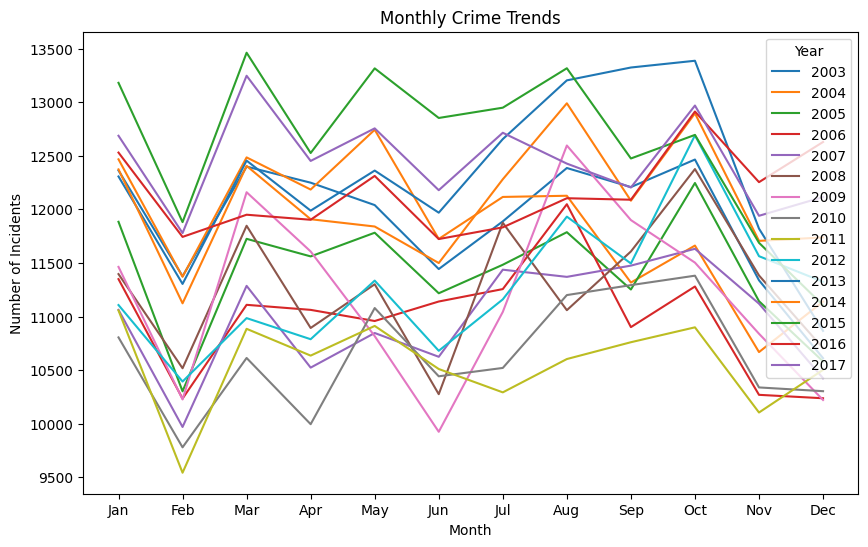

In [ ]:
# Plot the temporal analysis
monthly_crime_counts = crime_data.groupby([crime_data.index.year, crime_data.index.month]).size().unstack()
monthly_crime_counts = monthly_crime_counts.drop(2018, axis=0)
plt.figure(figsize=(10, 6))
for year, data in monthly_crime_counts.iterrows():
    data.plot(label=year)

plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

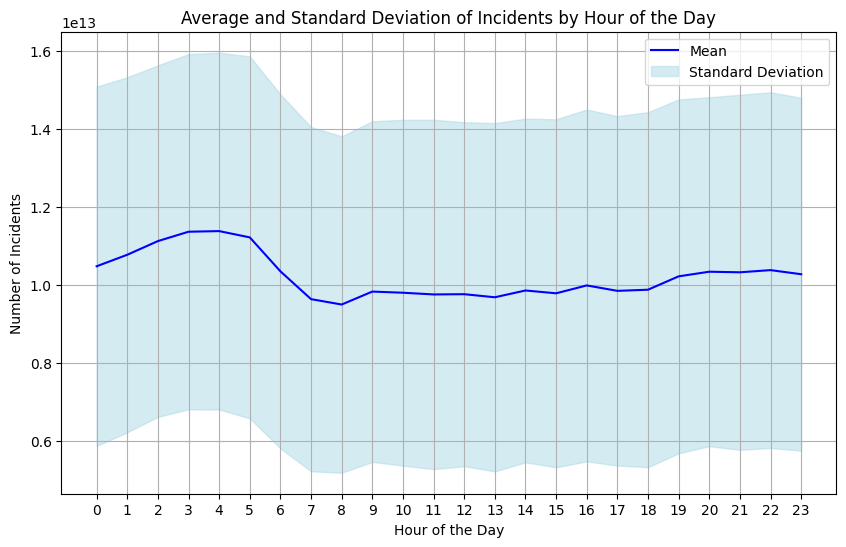

In [ ]:
# Extract hour from the 'time' column
crime_data['time'] = pd.to_datetime(crime_data['time'])
crime_data['hour'] = crime_data['time'].dt.hour

#burglary looks good
sepcific_crime_data = crime_data[crime_data['category'] == 'burglary']
# Group data by hour and calculate mean and standard deviation

hourly_crime_stats = sepcific_crime_data.groupby('hour')['id'].agg(['mean', 'std'])

# Plot the average and shade the area representing one standard deviation
plt.figure(figsize=(10, 6))
plt.plot(hourly_crime_stats.index, hourly_crime_stats['mean'], color='blue', label='Mean')
plt.fill_between(hourly_crime_stats.index, hourly_crime_stats['mean'] - hourly_crime_stats['std'], hourly_crime_stats['mean'] + hourly_crime_stats['std'], color='lightblue', alpha=0.5, label='Standard Deviation')
plt.title('Average and Standard Deviation of Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


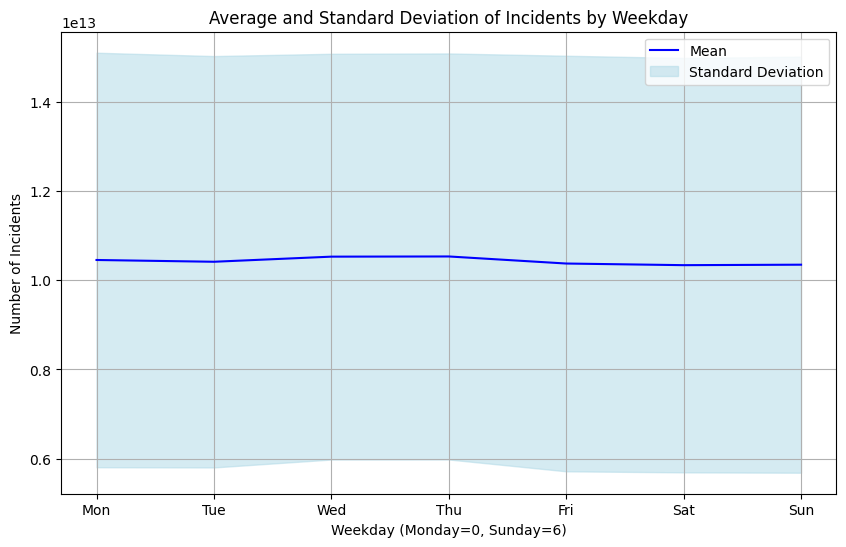

In [ ]:
# Group data by weekday and calculate mean and standard deviation

weekday_crime_stats = crime_data.groupby('weekday')['id'].agg(['mean', 'std'])

# Plot the average and shade the area representing one standard deviation
plt.figure(figsize=(10, 6))
plt.plot(weekday_crime_stats.index, weekday_crime_stats['mean'], color='blue', label='Mean')
plt.fill_between(weekday_crime_stats.index, weekday_crime_stats['mean'] - weekday_crime_stats['std'], weekday_crime_stats['mean'] + weekday_crime_stats['std'], color='lightblue', alpha=0.5, label='Standard Deviation')
plt.title('Average and Standard Deviation of Incidents by Weekday')
plt.xlabel('Weekday (Monday=0, Sunday=6)')
plt.ylabel('Number of Incidents')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(True)
plt.show()

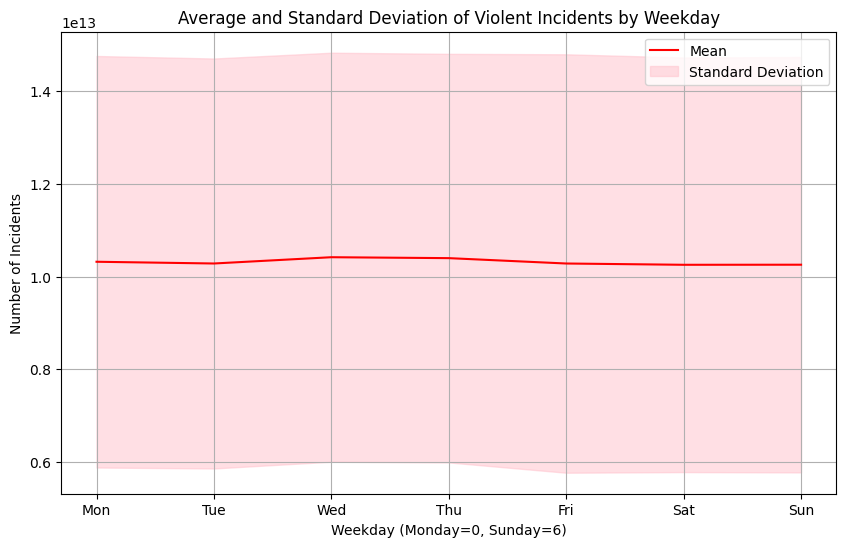

In [ ]:
# Filter data to include only incidents labeled as "violent"
violent_crime_data = crime_data[crime_data['label'] == 'violent']

# Group filtered data by weekday and calculate mean and standard deviation
violent_weekday_crime_stats = violent_crime_data.groupby('weekday')['id'].agg(['mean', 'std'])

# Plot the average and shade the area representing one standard deviation
plt.figure(figsize=(10, 6))
plt.plot(violent_weekday_crime_stats.index, violent_weekday_crime_stats['mean'], color='red', label='Mean')
plt.fill_between(violent_weekday_crime_stats.index, violent_weekday_crime_stats['mean'] - violent_weekday_crime_stats['std'], violent_weekday_crime_stats['mean'] + violent_weekday_crime_stats['std'], color='pink', alpha=0.5, label='Standard Deviation')
plt.title('Average and Standard Deviation of Violent Incidents by Weekday')
plt.xlabel('Weekday (Monday=0, Sunday=6)')
plt.ylabel('Number of Incidents')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import folium

# Create a map centered around the mean of latitude and longitude
map_center = [crime_data['latitude'].mean(), crime_data['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

counter = 0
# Add markers for each incident
for index, row in crime_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['category']).add_to(mymap)
    if counter == 100:
      break;
    counter += 1

# Save the map as an HTML file
mymap.save('crime_map.html')


In [ ]:
# Calculate total minutes elapsed since midnight
crime_data['total_minutes'] = crime_data['time'].dt.hour * 60 + crime_data['time'].dt.minute

print(crime_data['total_minutes'])


date
2005-06-22     740
2006-07-15      55
2007-09-25       1
2011-09-24     660
2003-12-12     720
              ... 
2017-06-22     102
2017-09-01    1020
2017-06-30    1070
2017-12-20     941
2017-10-27    1290
Name: total_minutes, Length: 2129216, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
category_encoder = LabelEncoder()
weekday_encoder = LabelEncoder()

# Fit and transform the category column
crime_data['input_category'] = category_encoder.fit_transform(crime_data['category'])
crime_data['input_weekday'] = weekday_encoder.fit_transform(crime_data['category'])
